# Problem 7.5.3 (Atmospheric Pressure versus Boiling Point of Water, cf. [44], Chap. 1.1).

In 1857 the Scottish physicist James D. Forbes discussed an experiment concerning the relationship between atmospheric pressure and the boiling point of water. At the time it was known that altitude could be determined from atmospheric pressure. In the middle of the nineteenth century, barometers were fragile instruments, and Forbes had the idea to replace barometers by a simpler measurement of the boiling point of water.

He measured in the Alps and in Scotland at each location the pressure [in inHg] with a barometer and the boiling point [in ◦F] using a thermometer. The data set forbes.dat contains the pressure and the boiling point.

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import scipy as scp

In [11]:
df = pd.read_csv('./04 Datasets/forbes.dat', sep='\t',)

df['Pressure_log'] = np.log10(df['Pressure'])

df.describe()

,Boiling,Pressure,Pressure_log
count,17.000000,17.000000,17.000000
mean,202.952941,25.058824,1.396041
std,5.759679,3.020118,0.051715
min,194.300000,20.790000,1.317854
25%,199.400000,23.150000,1.364551
50%,201.300000,24.010000,1.380392
75%,208.600000,27.760000,1.443419
max,212.200000,30.060000,1.477989


### a) Plot the boiling point versus the logarithm (base 10) of the pressure. What are your observations?

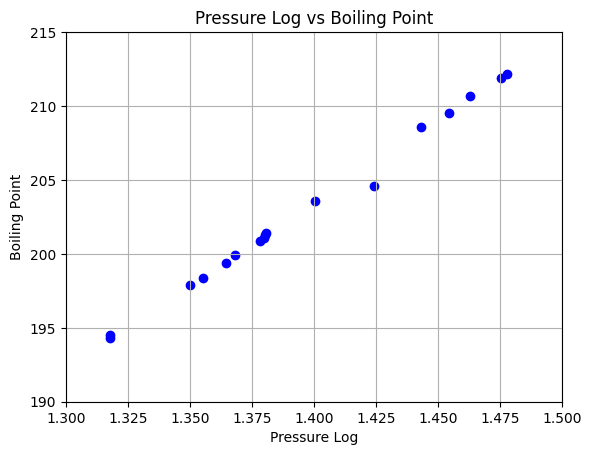

In [22]:
def print_scatter(passed_df):
  plt.close()

  plt.xlim(1.3, 1.5)
  plt.ylim(190, 215)

  plt.xlabel('Pressure Log')
  plt.ylabel('Boiling Point')
  plt.title('Pressure Log vs Boiling Point')

  plt.scatter(passed_df['Pressure_log'], passed_df['Boiling'], color='blue')

  plt.grid()

print_scatter(df)

plt.show()

REMARKS: Looks like there is an outlier close to 205 (not fitting the line at all)

### b) Fit and plot a straight line to the transformed data points. Give the estimated parameter values. What are your observations?

In [29]:
# with model
model = smf.ols('Boiling ~ Pressure_log', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Boiling   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2962.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           1.19e-18
Time:                        17:26:55   Log-Likelihood:                -8.4026
No. Observations:                  17   AIC:                             20.81
Df Residuals:                      15   BIC:                             22.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       47.8638      2.852     16.784   

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  k, _ = kurtosistest(a, axis)


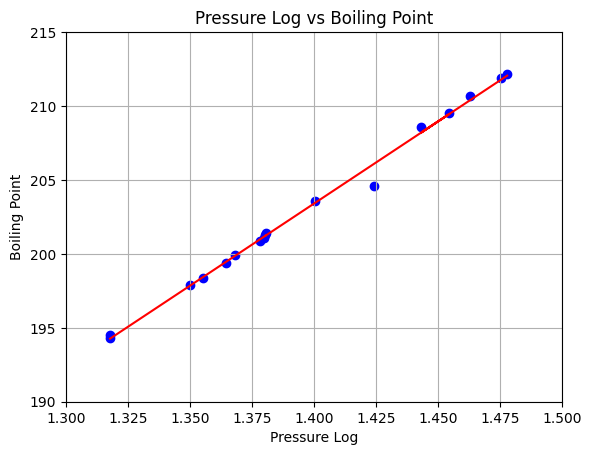

In [30]:
print_scatter(df)

plt.plot(df['Pressure_log'], model.predict(df), color='red')

plt.show()

### c) Drop number 12 and fit & plot the model again

                            OLS Regression Results                            
Dep. Variable:                Boiling   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2527.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           3.24e-17
Time:                        17:28:23   Log-Likelihood:                -8.3900
No. Observations:                  16   AIC:                             20.78
Df Residuals:                      14   BIC:                             22.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       47.9313      3.078     15.574   

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  k, _ = kurtosistest(a, axis)


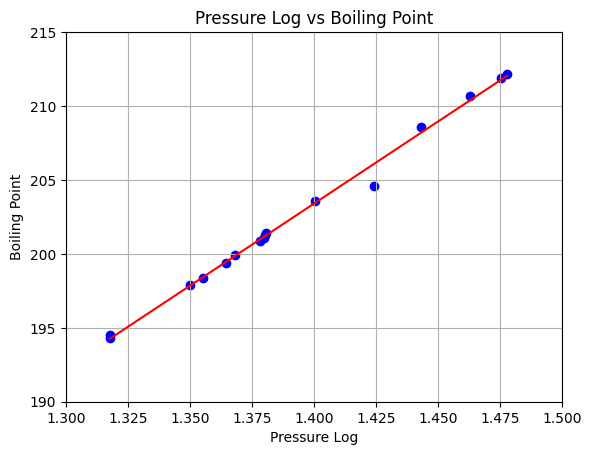

In [32]:
new_df = df.copy()
new_df.drop(12, inplace=True)

new_model = smf.ols('Boiling ~ Pressure_log', data=new_df).fit()
print(new_model.summary())

print_scatter(new_df)

plt.plot(new_df['Pressure_log'], new_model.predict(), color='red')

plt.show()

### d) Test the slope for significance of regression on the 5% model

null hypothesis H0: beta1 = 0

In [34]:
print(new_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Boiling   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2527.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           3.24e-17
Time:                        17:30:16   Log-Likelihood:                -8.3900
No. Observations:                  16   AIC:                             20.78
Df Residuals:                      14   BIC:                             22.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       47.9313      3.078     15.574   

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  k, _ = kurtosistest(a, axis)


REMARKS: Since the P-value Pr(>|t|)=0.000 for the slope is much snaller than 5% we reject the null hypothesis and conclude that there is a significant linear relationship between the logarithm of the atmospheric pressure and the boiling point of water.

### e) 95% Confidence Interval

In [35]:
print(new_model.conf_int(alpha=0.05))

                       0           1
Intercept      41.330238   54.532399
Pressure_log  106.304342  115.780123


f) Find an estimation of the boiling point at the pressure 26 inHg using the model fit to the transformed data. Calculate the 95% confidence interval of the response of this estimator and add the complete confidence interval band to the scatter diagram.

In [41]:
x = np.log10(26)
print(f"{x=}")

# with model
y_bar = new_model.predict({'Pressure_log': x})
print(f"{y_bar=}")

# manual
y_bar_manual = new_model.params['Intercept'] + new_model.params['Pressure_log'] * x
print(f"{y_bar_manual=}")

x=1.414973347970818
y_bar=0    205.053118
dtype: float64
y_bar_manual=205.05311803077015


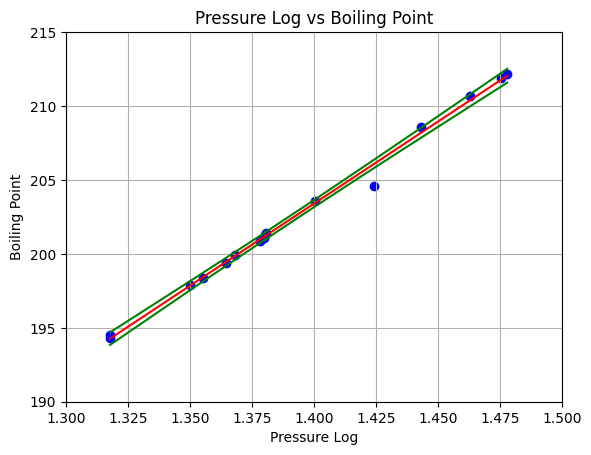

In [43]:
# add confidence interval to scatterplots
print_scatter(new_df)

plt.plot(new_df['Pressure_log'], new_model.predict(), color='red')

plt.plot(new_df['Pressure_log'], new_model.get_prediction({'Pressure_log': new_df['Pressure_log']}).conf_int()[:, 0], color='green')
plt.plot(new_df['Pressure_log'], new_model.get_prediction({'Pressure_log': new_df['Pressure_log']}).conf_int()[:, 1], color='green')

plt.show()